Mean Squared Error: 3.280576032938672


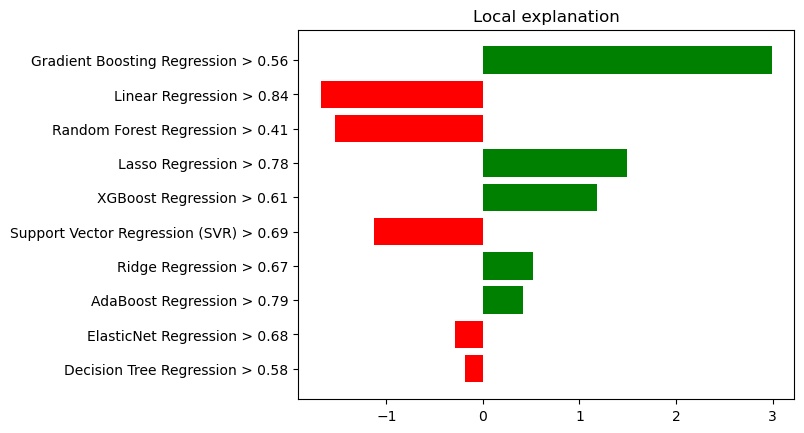

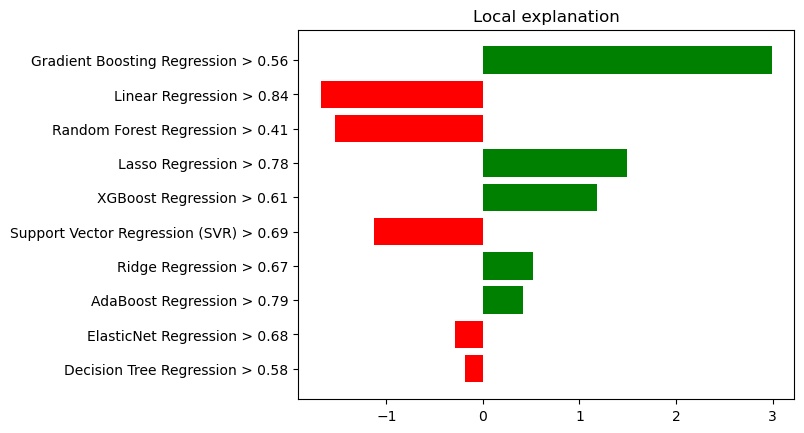

In [1]:
import pandas as pd
import numpy as np
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your two datasets
dataset_path_1 = r"C:\Users\sanay\Desktop\MACHINE LEARNING\Dataset 1_predictions.xlsx"  # Dataset 1
dataset_path_2 = r"C:\Users\sanay\Desktop\MACHINE LEARNING\Dataset 2_predictions.xlsx"  # Dataset 2

# Load the datasets
df1 = pd.read_excel(dataset_path_1)
df2 = pd.read_excel(dataset_path_2)

# Combine datasets (if you want to analyze them together)
df = pd.concat([df1, df2])

features = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Support Vector Regression (SVR)','Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'AdaBoost Regression', 'XGBoost Regression']  # Specify your feature columns
target_column = 'Actual'  # Specify your target column

# Extract the features and target
X = df[features]
y = df[target_column]

# Scaling the features to improve model performance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (e.g., 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a model (using a simple linear regression model here for LIME explanation)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the model performance
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

# LIME Analysis
# Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=features,
    mode='regression'  # Mode is regression as you're predicting continuous values
)

# Choose an instance to explain (randomly pick one from the test set)
instance_idx = np.random.randint(0, X_test.shape[0])
instance = X_test[instance_idx]

# Generate LIME explanation for this instance
explanation = explainer.explain_instance(instance, model.predict)

# Plot the explanation
explanation.show_in_notebook()

# Optionally, plot the feature importance
fig = explanation.as_pyplot_figure()
plt.show()

# To visualize feature importance, you can also plot a bar chart of feature weights
explanation.as_pyplot_figure()
